In [5]:
import sys
sys.path.append('..')
from logger import load_bundle
from matplotlib.pyplot import *
from numpy import pi

In [6]:
def load(file_name):
    return load_bundle(f"../Diploma Thesis/{file_name}")

file_names = ['benchmark_cascadepid_original_constants.hc3',
              'benchmark_cascadepid_random_constants.hc3',
              'benchmark_cascadepid_lower_constants.hc3',
              'benchmark_cascadepid_upper_constants.hc3',
              'benchmark_gainsched_original_constants.hc3',
              'benchmark_gainsched_random_constants.hc3',
              'benchmark_gainsched_lower_constants.hc3',
              'benchmark_gainsched_upper_constants.hc3',
              'benchmark_tvlqr_original_constants.hc3',
              'benchmark_tvlqr_random_constants.hc3',
              'benchmark_tvlqr_lower_constants.hc3',
              'benchmark_tvlqr_upper_constants.hc3',
              'benchmark_tvlqri_original_constants.hc3',
              'benchmark_tvlqri_random_constants.hc3',
              'benchmark_tvlqri_lower_constants.hc3',
              'benchmark_tvlqri_upper_constants.hc3',
              'benchmark_smclqr_original_constants.hc3',
              'benchmark_smclqr_random_constants.hc3',
              'benchmark_smclqr_lower_constants.hc3',
              'benchmark_smclqr_upper_constants.hc3',
              ]

ke = 60 * 10
deg = pi / 180

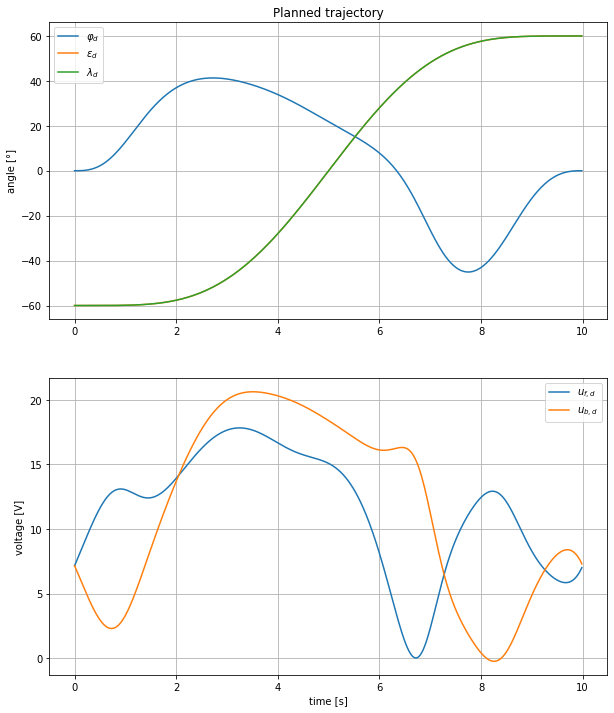

In [7]:
# Plot planned trajectory
bundle = load(file_names[0])
ts = bundle.ts[:ke]
figure(figsize=(10,12))
subplot(211)
title("Planned trajectory")
plot(ts, bundle.phi_ds[:ke, 0]/deg, label=r"$\varphi_d$")
plot(ts, bundle.eps_ds[:ke, 0]/deg, label=r"$\varepsilon_d$")
plot(ts, bundle.lamb_ds[:ke, 0]/deg, label=r"$\lambda_d$")
ylabel("angle [°]")
grid()
legend()

subplot(212)
plot(ts, bundle.vf_ds[:ke, 0]/deg, label=r"$u_{f,d}$")
plot(ts, bundle.vb_ds[:ke, 0]/deg, label=r"$u_{b,d}$")
xlabel("time [s]")
ylabel("voltage [V]")
grid()
legend()


In [8]:
def plot_tracking(file):
    bundle = load(file)
    figure(figsize=(10,18))
    subplot(311)
    title(file)
    plot(ts, bundle.phi_ds[:ke, 0]/deg, label=r"$\varphi_d$", color="blue", linestyle="dotted")
    plot(ts, bundle.xs[:ke, 0]/deg, label=r"$\varphi$", color="blue")
    plot(ts, bundle.eps_ds[:ke, 0]/deg, label=r"$\varepsilon_d$", color="orange", linestyle="dotted")
    plot(ts, bundle.xs[:ke, 1]/deg, label=r"$\varepsilon$", color="orange")
    plot(ts, bundle.lamb_ds[:ke, 0]/deg, label=r"$\lambda_d$", color="green", linestyle = "dotted")
    plot(ts, bundle.xs[:ke, 2]/deg, label=r"$\lambda$", color="green")
    ylabel("angle [°]")
    grid()
    legend()
    
    subplot(312)
    #plot(ts, (bundle.xs[:ke, 0] - bundle.phi_ds[:ke, 0])/deg, label=r"$e_\varphi$", color="blue")
    plot(ts, (bundle.xs[:ke, 1] - bundle.eps_ds[:ke, 0])/deg, label=r"$e_\varepsilon$", color="orange")
    plot(ts, (bundle.xs[:ke, 2] - bundle.lamb_ds[:ke, 0])/deg, label=r"$e_\lambda$", color="green")
    ylabel("angle error [°]")
    grid()
    legend()
    
    subplot(313)
    plot(ts, bundle.vf_ds[:ke, 0], label=r"$u_{f,d}$", color="blue", linestyle="dotted")
    plot(ts, bundle.us[:ke, 0], label=r"$u_f$", color="blue")
    plot(ts, bundle.vb_ds[:ke, 0], label=r"$u_{b,d}$", color="orange", linestyle="dotted")
    plot(ts, bundle.us[:ke, 1], label=r"$u_b$", color="orange")
    xlabel("time [s]")
    ylabel("voltage [V]")
    grid()
    legend()

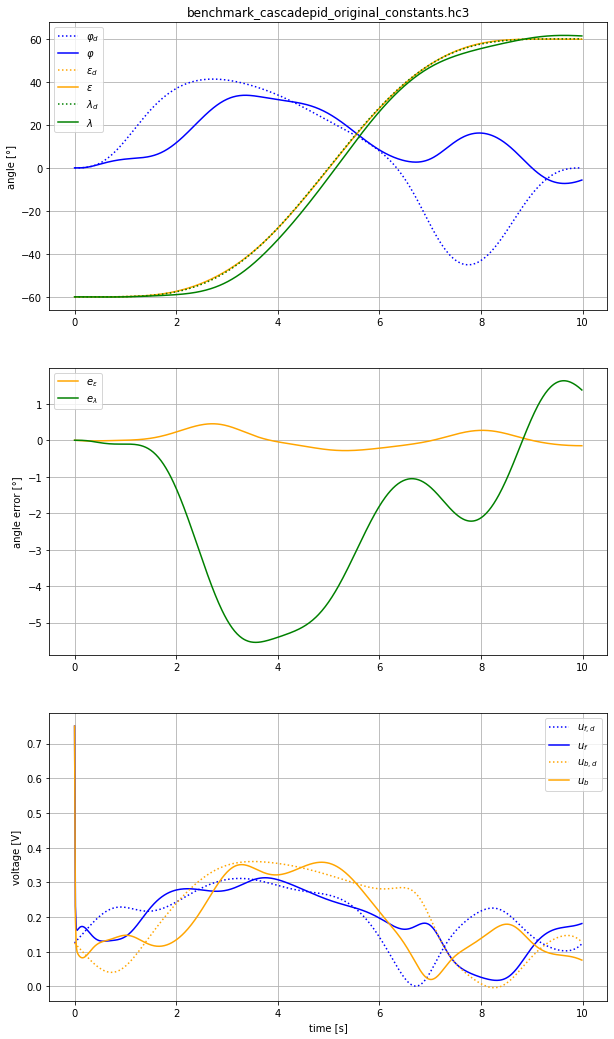

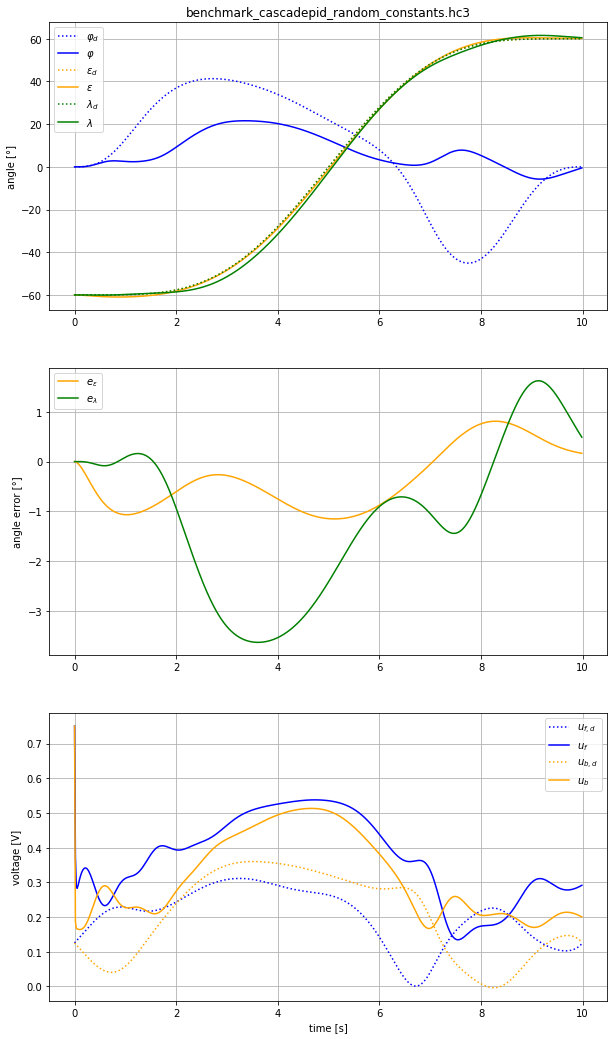

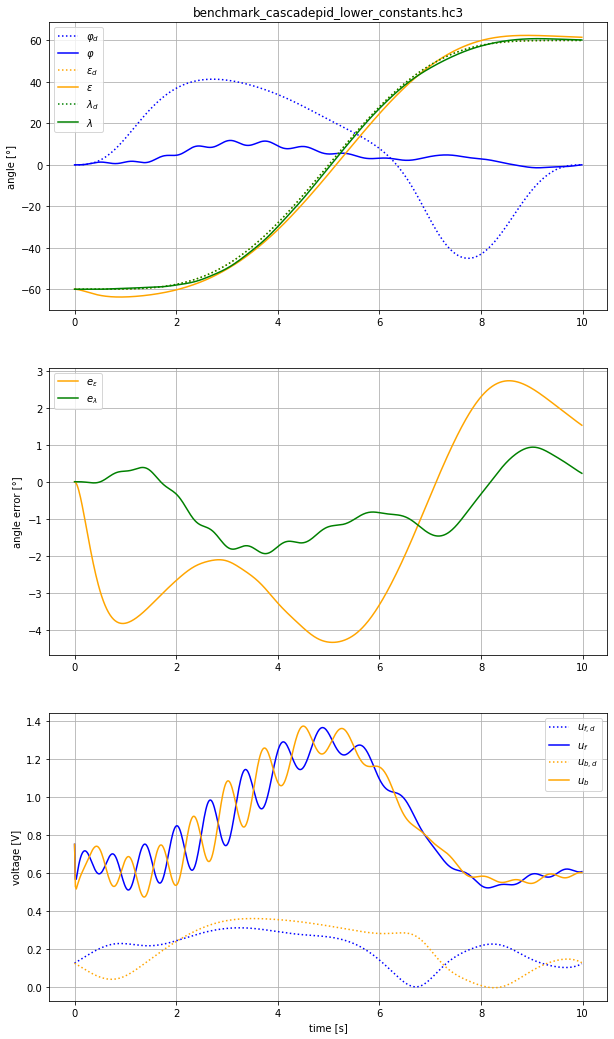

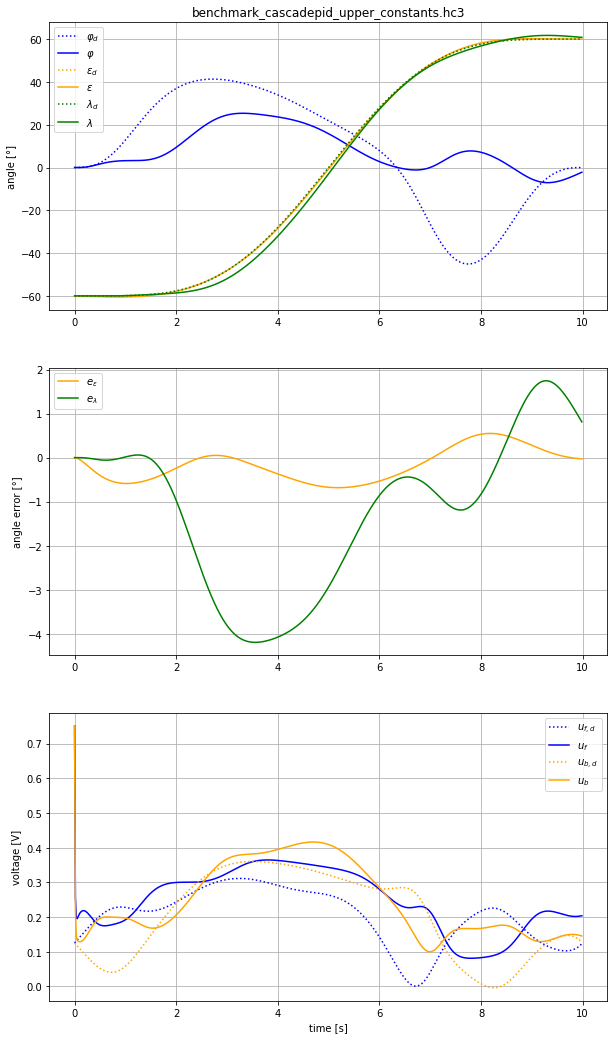

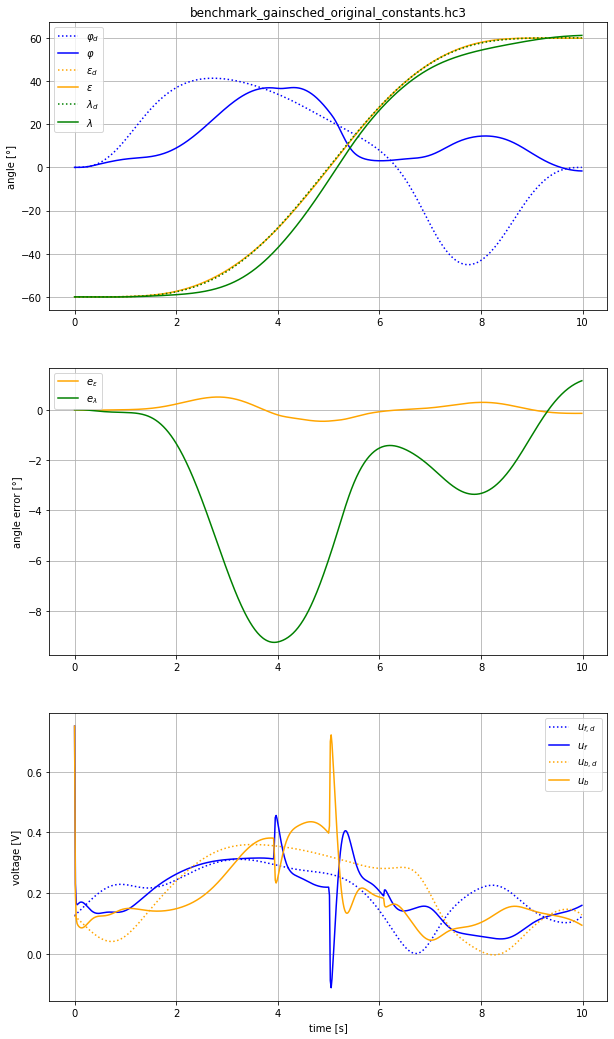

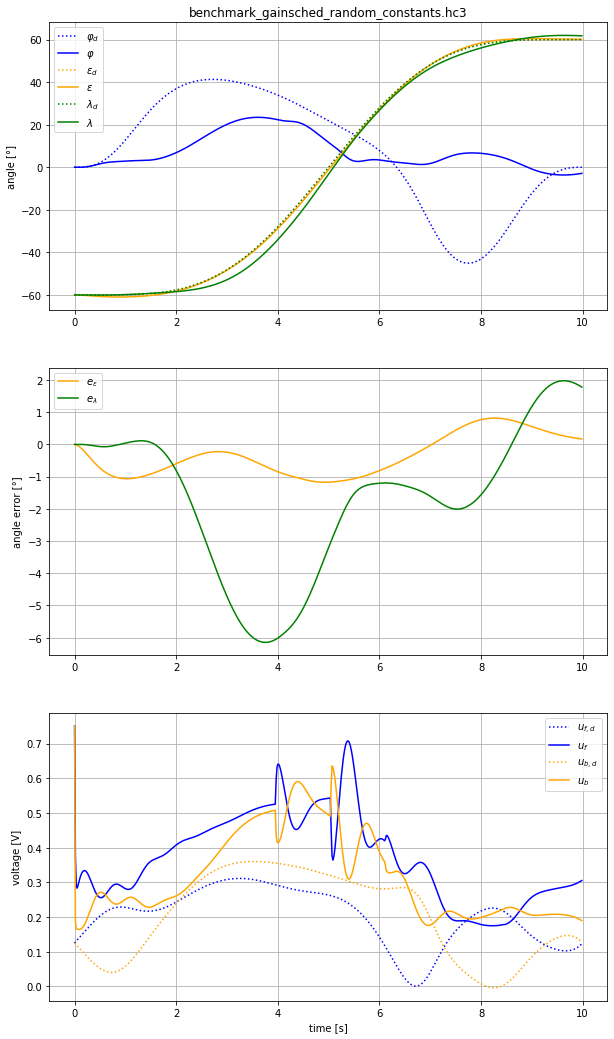

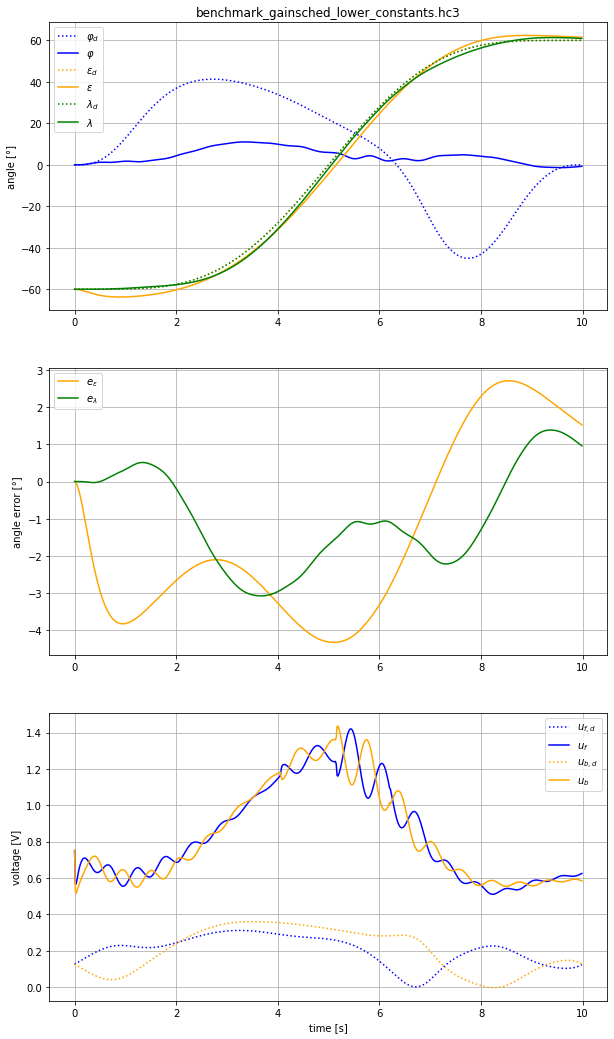

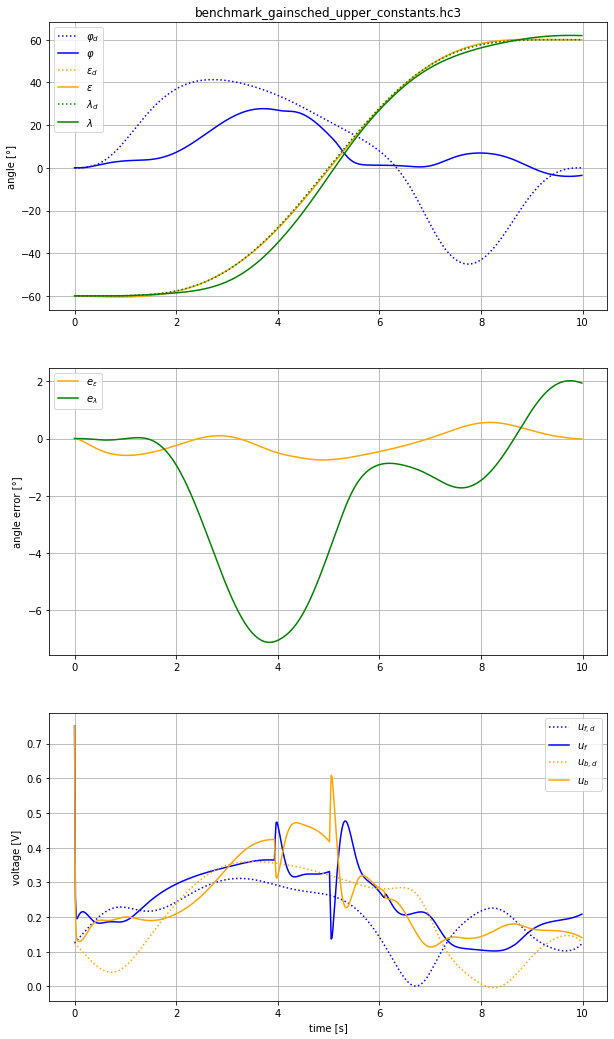

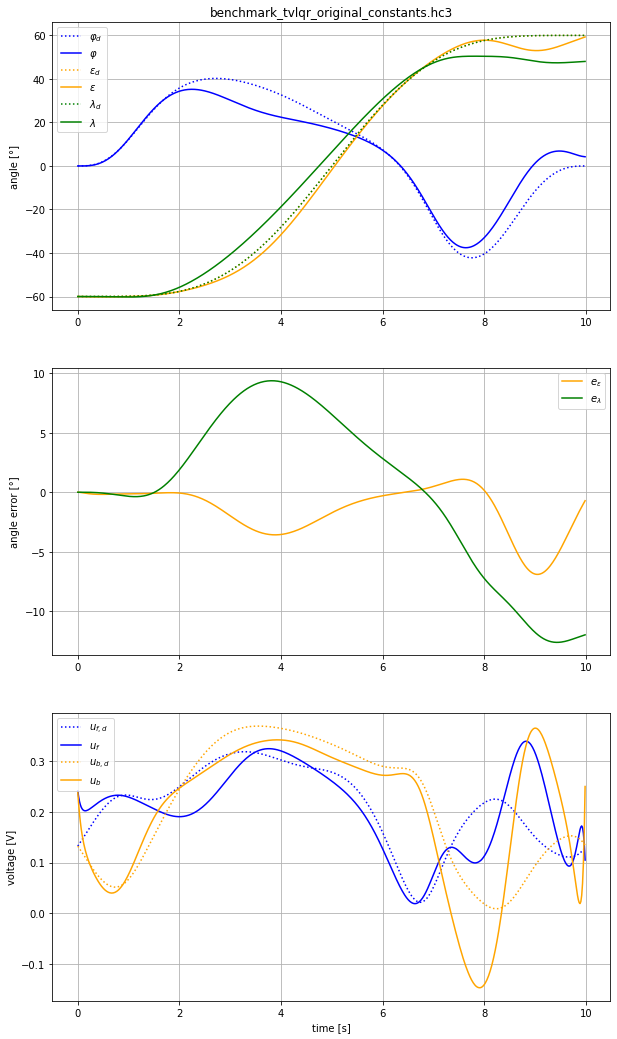

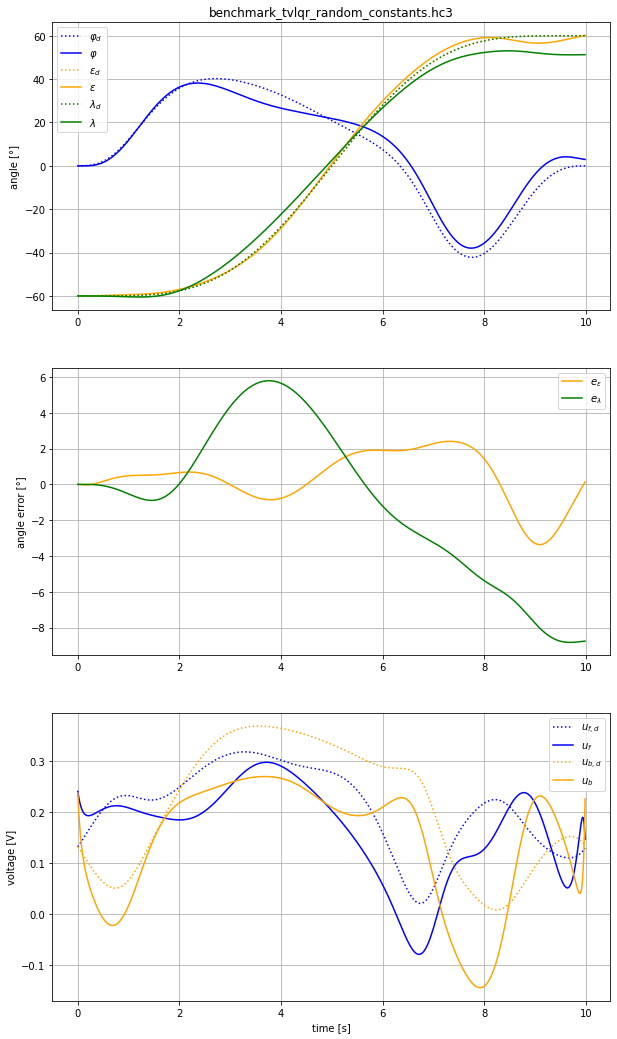

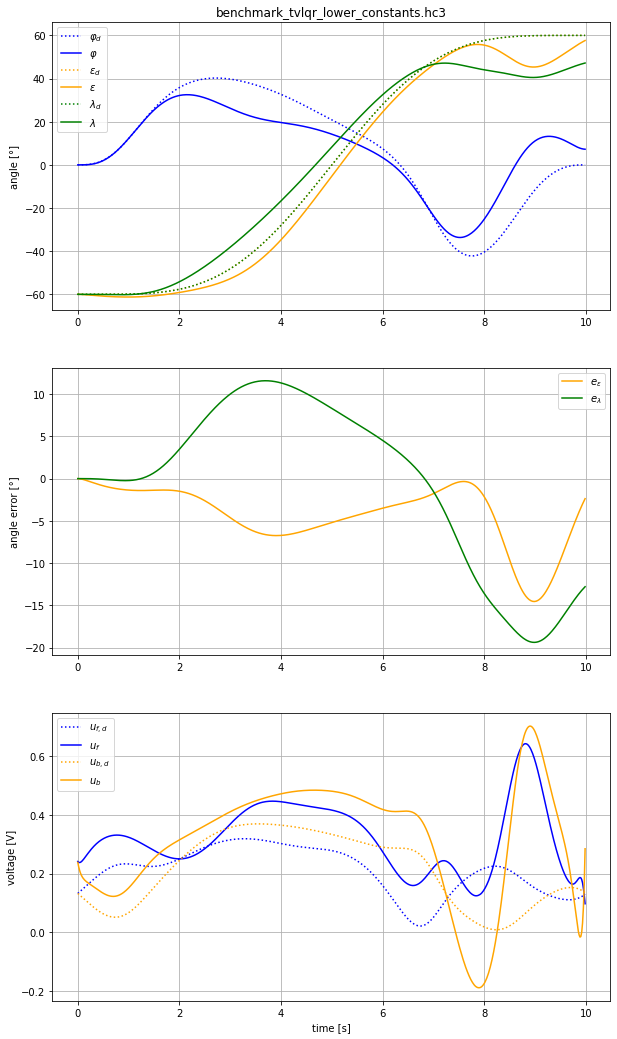

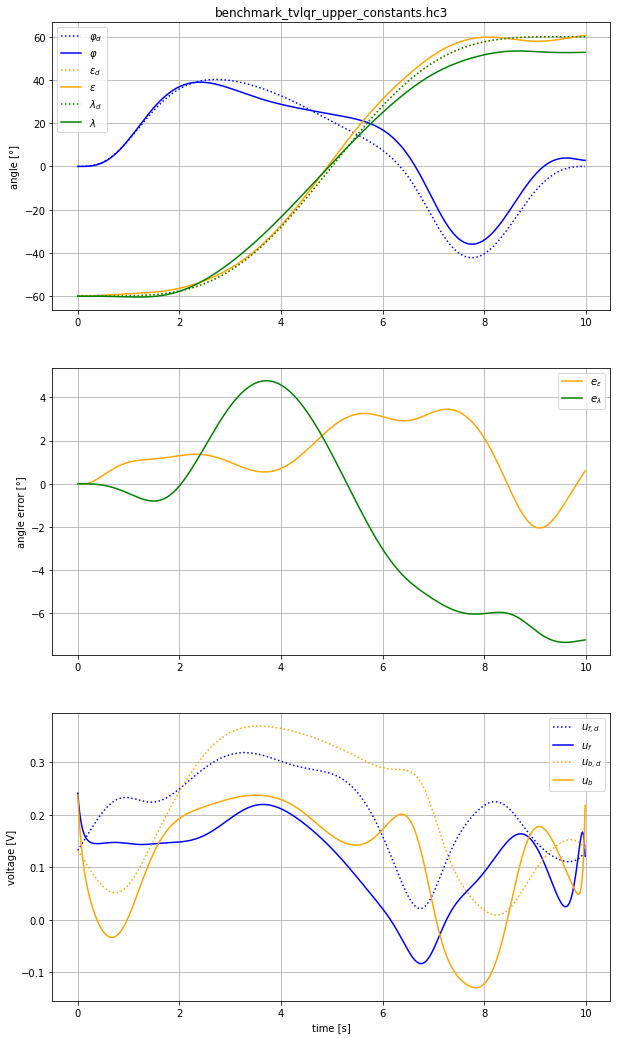

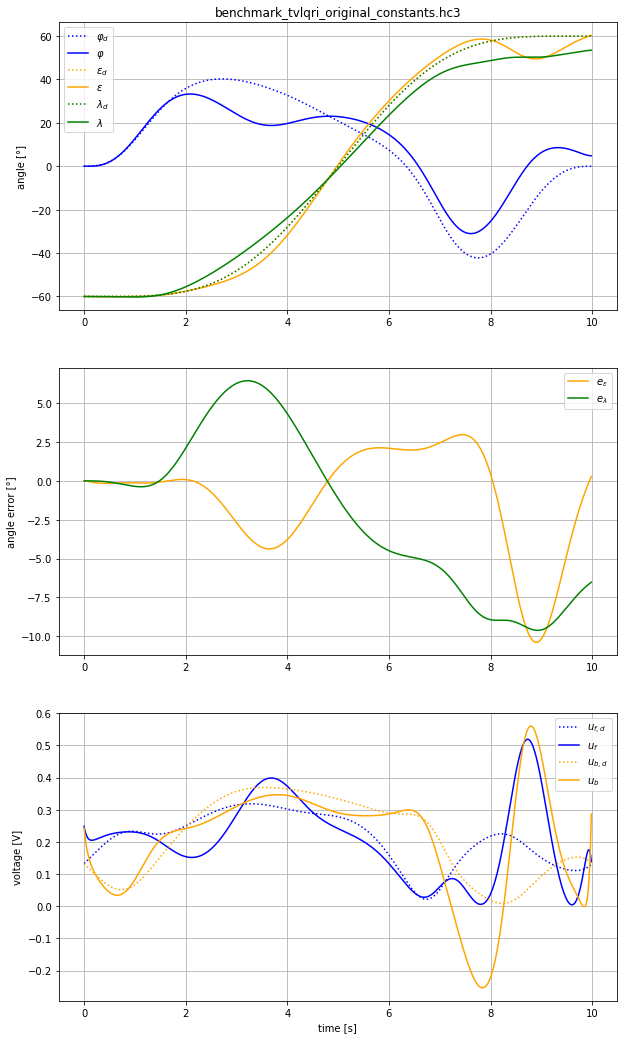

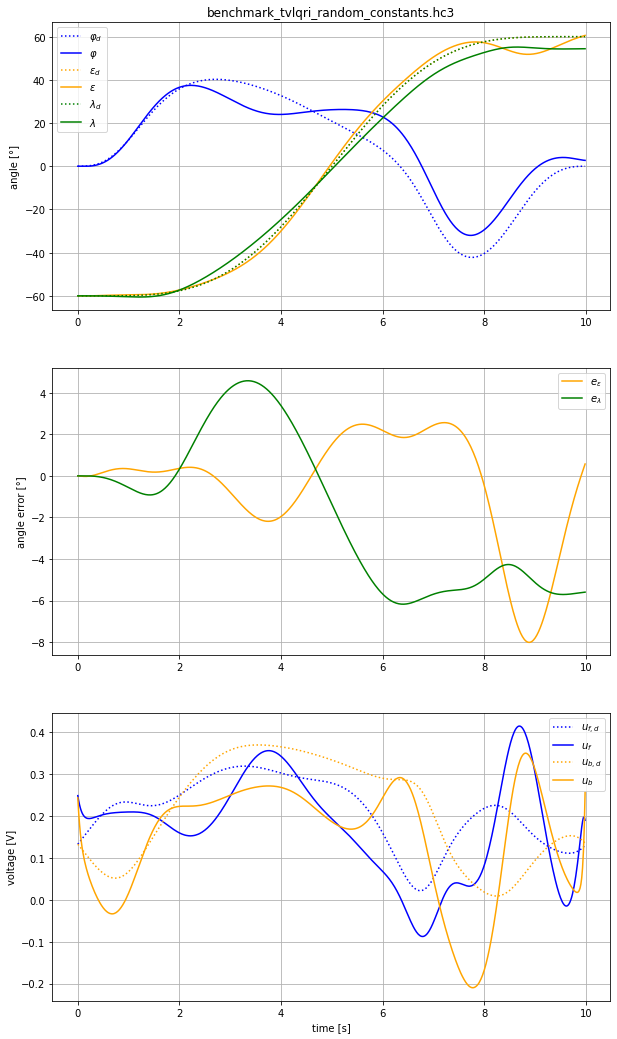

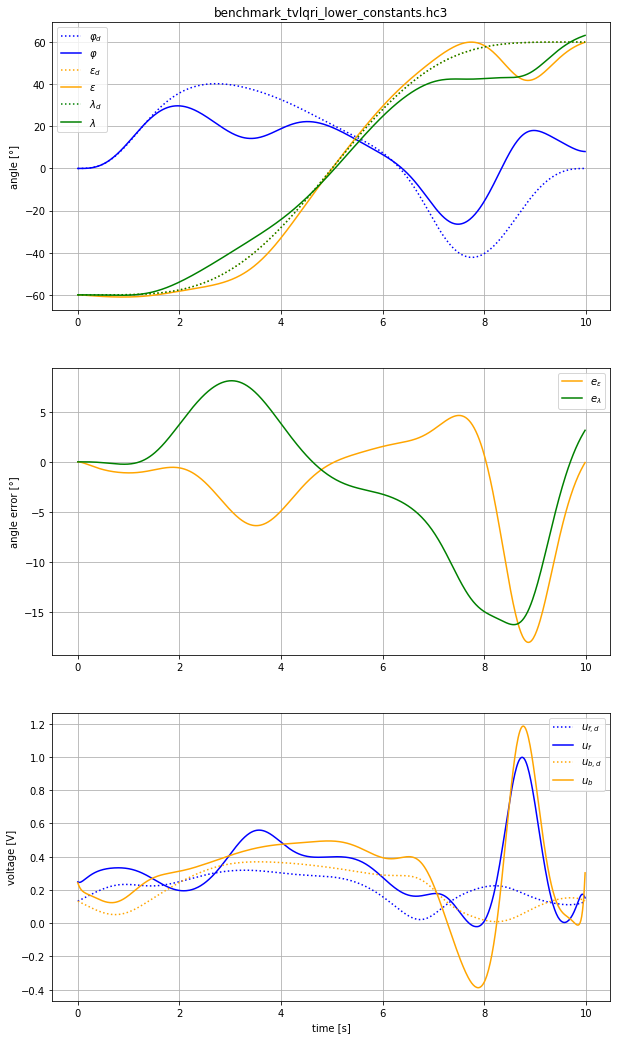

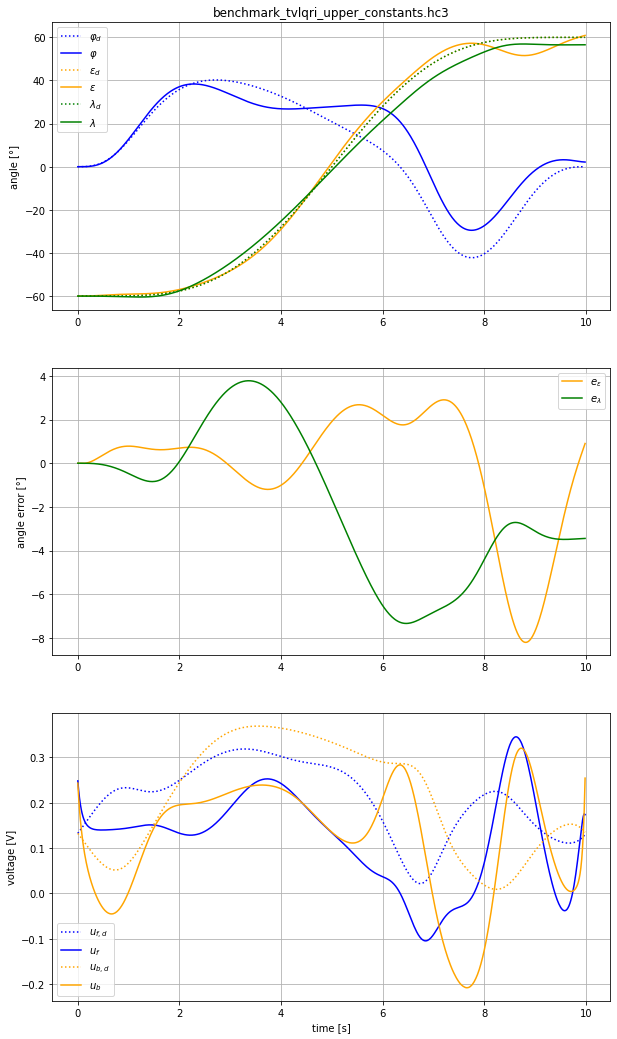

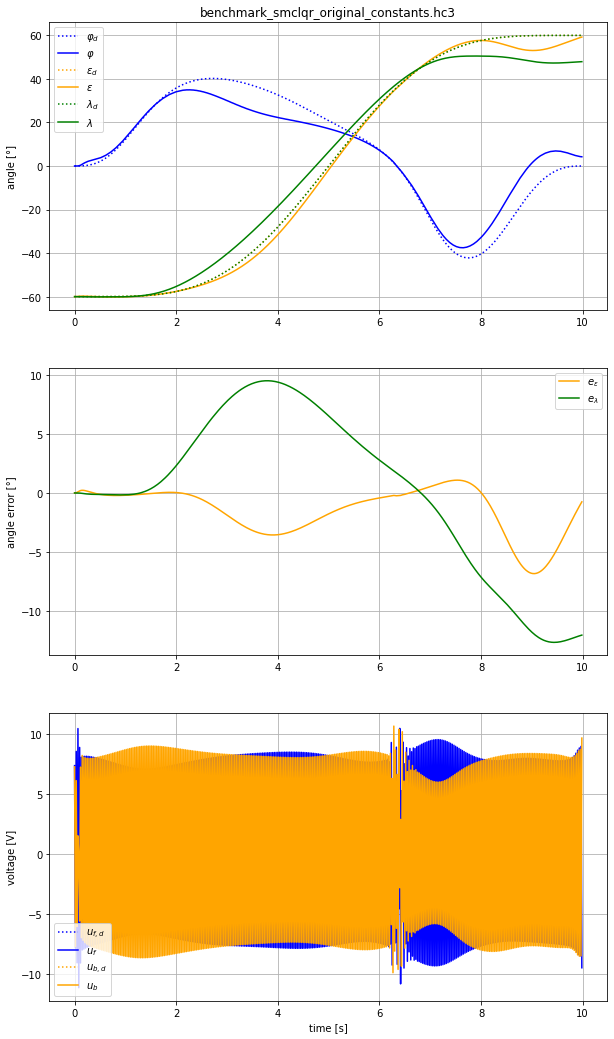

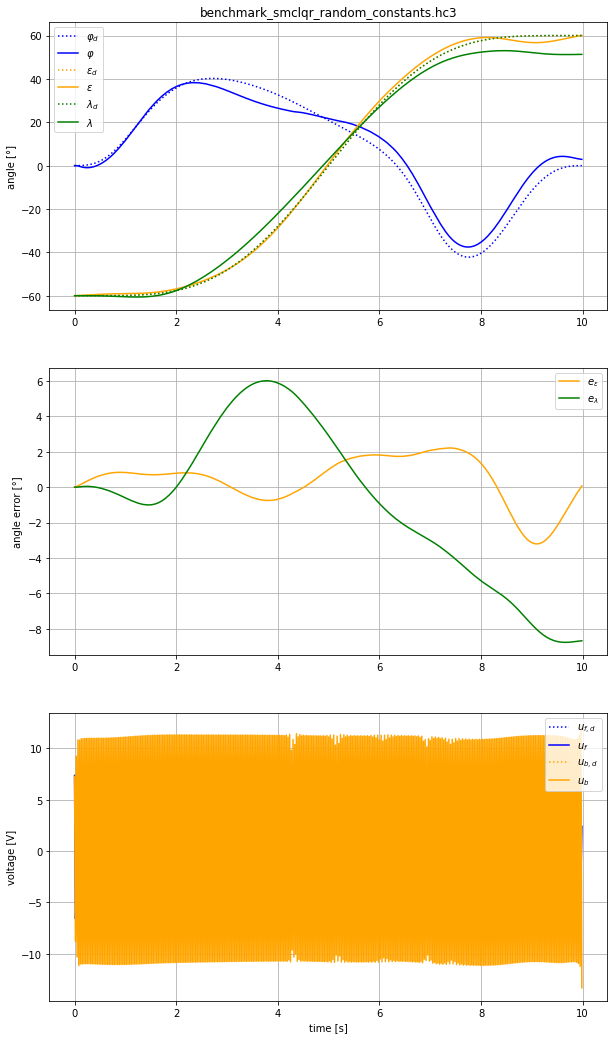

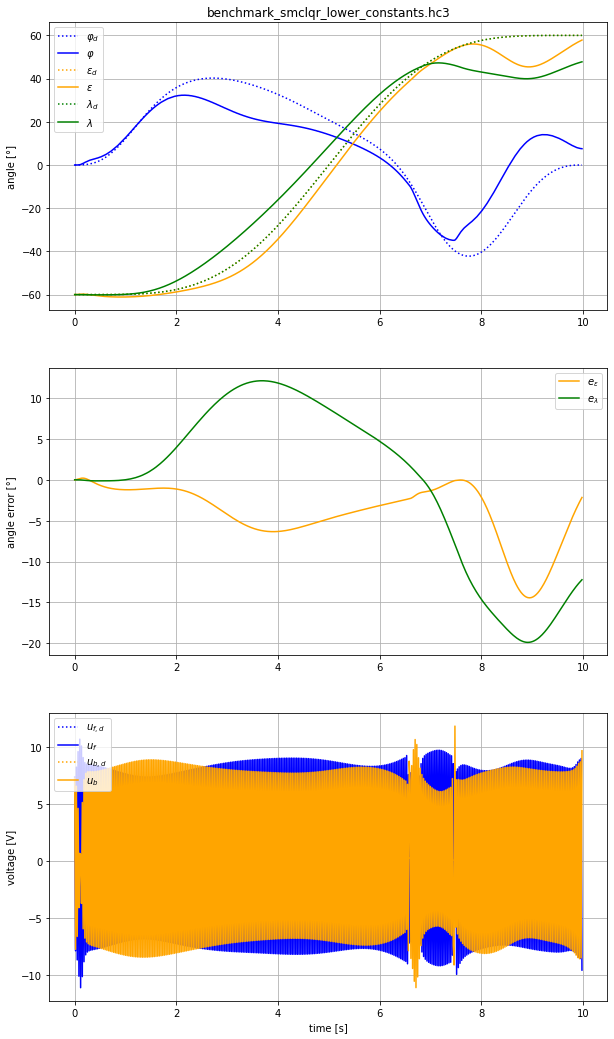

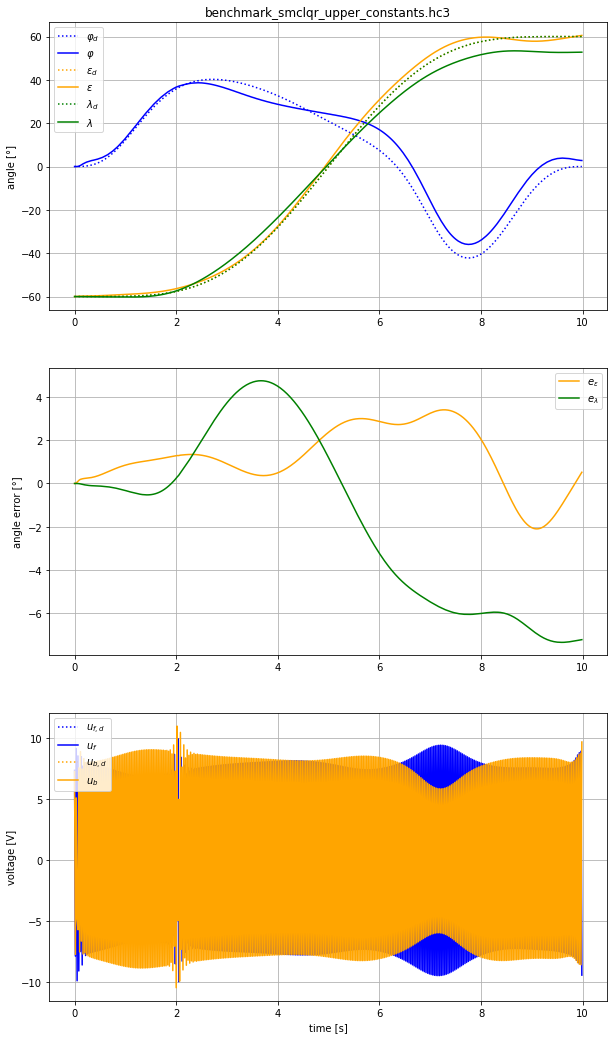

In [9]:
for file in file_names:
    plot_tracking(file)